
Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31    0.019184
2014-04-30    0.099049
2014-05-30    0.076505
2014-06-30    0.010533
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                AAPL
Date                
2014-02-28       NaN
2014-03-31  0.019184
2014-04-30  0.099049
2014-05-30  0.076505
2014-06-30  0.010533

Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31    0.009835
2014-04-30    0.000779
2014-05-30    0.050603
2014-06-30    0.046869
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                AAPL      ABBV
Date                          
2014-02-28       NaN       NaN
2014-03-31  0.019184  0.009835
2014-04-30  0.099049  0.000779
2014-05-30  0.076505  0.050603
2014-06-30  0.010533  0.046869

Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31   -0.076584
2014-04-30   -0.061662
2014-05-30    0.080171
2014-06-30    0.1015

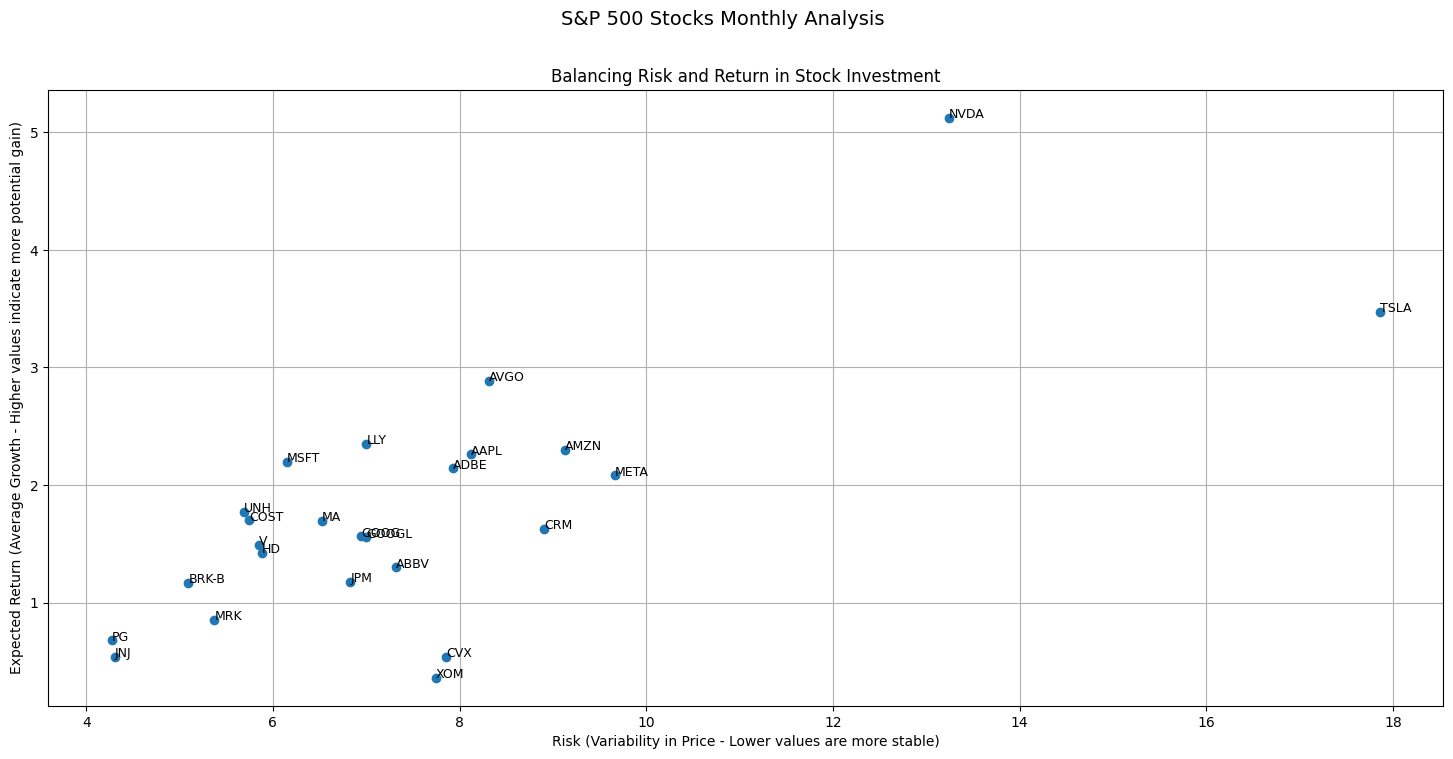

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

stock_path = '../Data Collection & Processing/top25_SP500'
# df to store the monthly percentage changes of each stock
df = pd.DataFrame()

for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.set_index('Date')

    # Resample based on months and capturre the closing state of the stock each month
    resampled = df_stock.resample('BM')
    # To select the last entry for each month
    monthly = resampled.apply(lambda x: x[-1])

    # Calculates the percentage change in the opening price for each month and 
    # stores it as a new column in the main DataFrame (df), named after the stock symbol.
    #new value - old value/old value
    percentage_change = monthly['Open'].pct_change()
    print("\nPercentage Change in Opening Price:")
    print(percentage_change.head())
    
    df[symbol] = percentage_change
    print("\nMain DataFrame with Percentage Change Column:")
    print(df.head())

# Drop NaNs
df = df.dropna()

# Calculate standard deviation and mean for each asset
risk = df.std() * 100  # Convert to percentage
expected_return = df.mean() * 100  # Convert to percentage

# Print out the results
for symbol in df.columns:
    print(f"Asset: {symbol}, Risk (Std Dev): {risk[symbol]:.2f}%, Expected Return (Mean): {expected_return[symbol]:.2f}%")

# Make the plot
plt.figure(figsize=(18,8))

# Scatterplot and annotation
plt.scatter(risk, expected_return)
for symbol in df.columns:
    plt.annotate(symbol, (risk[symbol], expected_return[symbol]), fontsize=9)

# Add gridlines
plt.grid(True)

# Enhanced Title and Axis Labels
plt.xlabel('Risk (Variability in Price - Lower values are more stable)')
plt.ylabel('Expected Return (Average Growth - Higher values indicate more potential gain)')
plt.title('Balancing Risk and Return in Stock Investment')
plt.suptitle('S&P 500 Stocks Monthly Analysis', fontsize=14)

plt.show()



Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31    0.039394
2014-04-30   -0.012026
2014-05-30   -0.090373
2014-06-30    0.021898
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                ^TNX
Date                
2014-02-28       NaN
2014-03-31  0.039394
2014-04-30 -0.012026
2014-05-30 -0.090373
2014-06-30  0.021898

Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31   -0.006125
2014-04-30   -0.016527
2014-05-30   -0.054400
2014-06-30    0.009036
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                ^TNX      ^TYX
Date                          
2014-02-28       NaN       NaN
2014-03-31  0.039394 -0.006125
2014-04-30 -0.012026 -0.016527
2014-05-30 -0.090373 -0.054400
2014-06-30  0.021898  0.009036
Asset: ^TNX, Risk (Std Dev): 11.74%, Expected Return (Mean): 1.04%
Asset: ^TYX, Risk (Std Dev): 8.18%, Expected Return (Mean): 0.47%


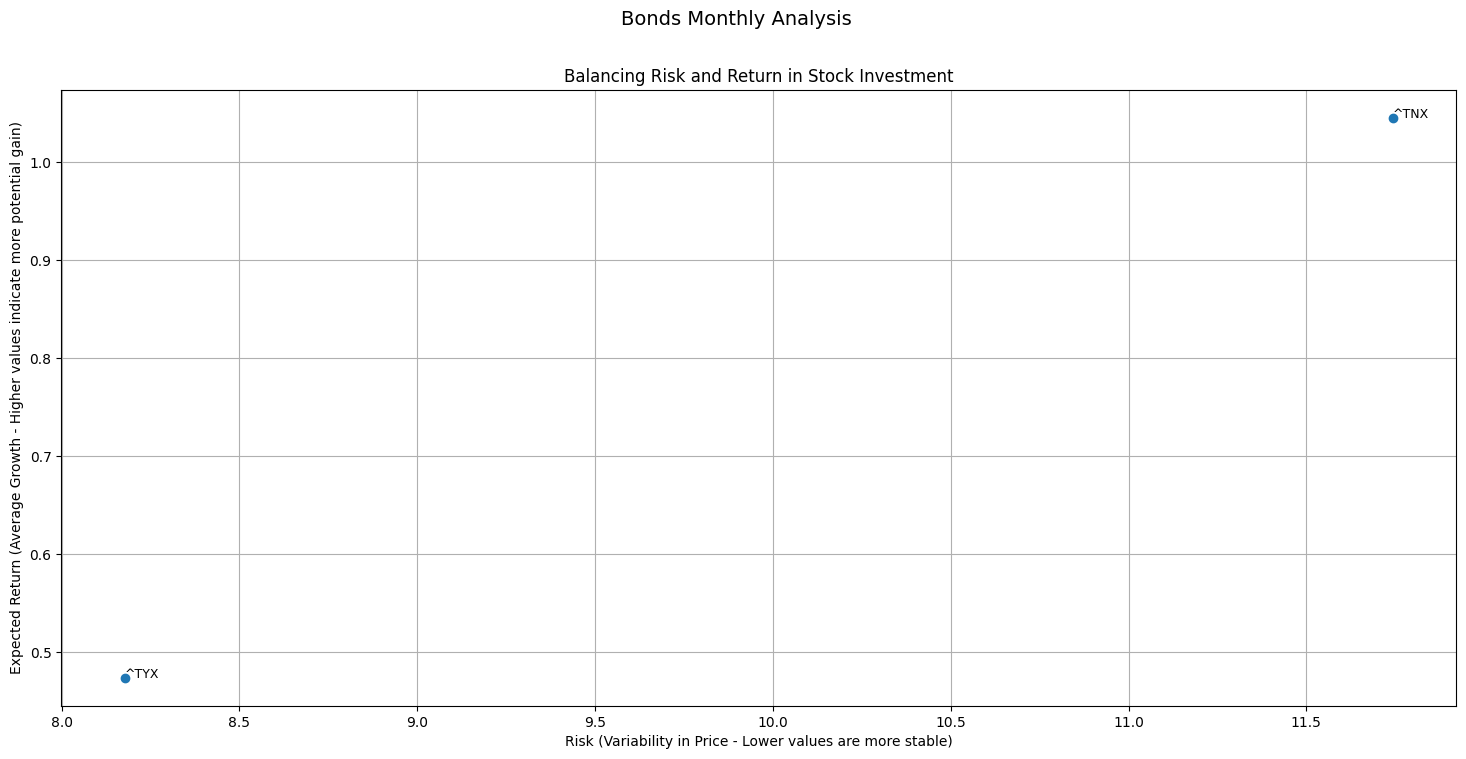

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

stock_path = '../Data Collection & Processing/bonds'
df = pd.DataFrame()

for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.set_index('Date')

    # Resample based on months and compute the changes
    resampled = df_stock.resample('BM')
    monthly = resampled.apply(lambda x: x[-1])

    # Calculates the percentage change in the opening price for each month and 
    # stores it as a new column in the main DataFrame (df), named after the stock symbol.
    #new value - old value/old value
    percentage_change = monthly['Open'].pct_change()
    print("\nPercentage Change in Opening Price:")
    print(percentage_change.head())
    
    df[symbol] = percentage_change
    print("\nMain DataFrame with Percentage Change Column:")
    print(df.head())

# Drop NaNs
df = df.dropna()

# Calculate standard deviation and mean for each asset
risk = df.std() * 100  # Convert to percentage
expected_return = df.mean() * 100  # Convert to percentage

# Print out the results
for symbol in df.columns:
    print(f"Asset: {symbol}, Risk (Std Dev): {risk[symbol]:.2f}%, Expected Return (Mean): {expected_return[symbol]:.2f}%")

# Make the plot
plt.figure(figsize=(18,8))

# Scatterplot and annotation
plt.scatter(risk, expected_return)
for symbol in df.columns:
    plt.annotate(symbol, (risk[symbol], expected_return[symbol]), fontsize=9)

# Add gridlines
plt.grid(True)

# Enhanced Title and Axis Labels
plt.xlabel('Risk (Variability in Price - Lower values are more stable)')
plt.ylabel('Expected Return (Average Growth - Higher values indicate more potential gain)')
plt.title('Balancing Risk and Return in Stock Investment')
plt.suptitle('Bonds Monthly Analysis', fontsize=14)

plt.show()


Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31   -0.007403
2014-04-30   -0.043287
2014-05-30    0.065154
2014-06-30   -0.032022
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                 CCI
Date                
2014-02-28       NaN
2014-03-31 -0.007403
2014-04-30 -0.043287
2014-05-30  0.065154
2014-06-30 -0.032022

Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31   -0.080819
2014-04-30    0.063189
2014-05-30   -0.002073
2014-06-30    0.021006
Freq: BM, Name: Open, dtype: float64

Main DataFrame with Percentage Change Column:
                 CCI         O
Date                          
2014-02-28       NaN       NaN
2014-03-31 -0.007403 -0.080819
2014-04-30 -0.043287  0.063189
2014-05-30  0.065154 -0.002073
2014-06-30 -0.032022  0.021006

Percentage Change in Opening Price:
Date
2014-02-28         NaN
2014-03-31    0.019251
2014-04-30    0.059528
2014-05-30   -0.003342
2014-06-30    0.0023

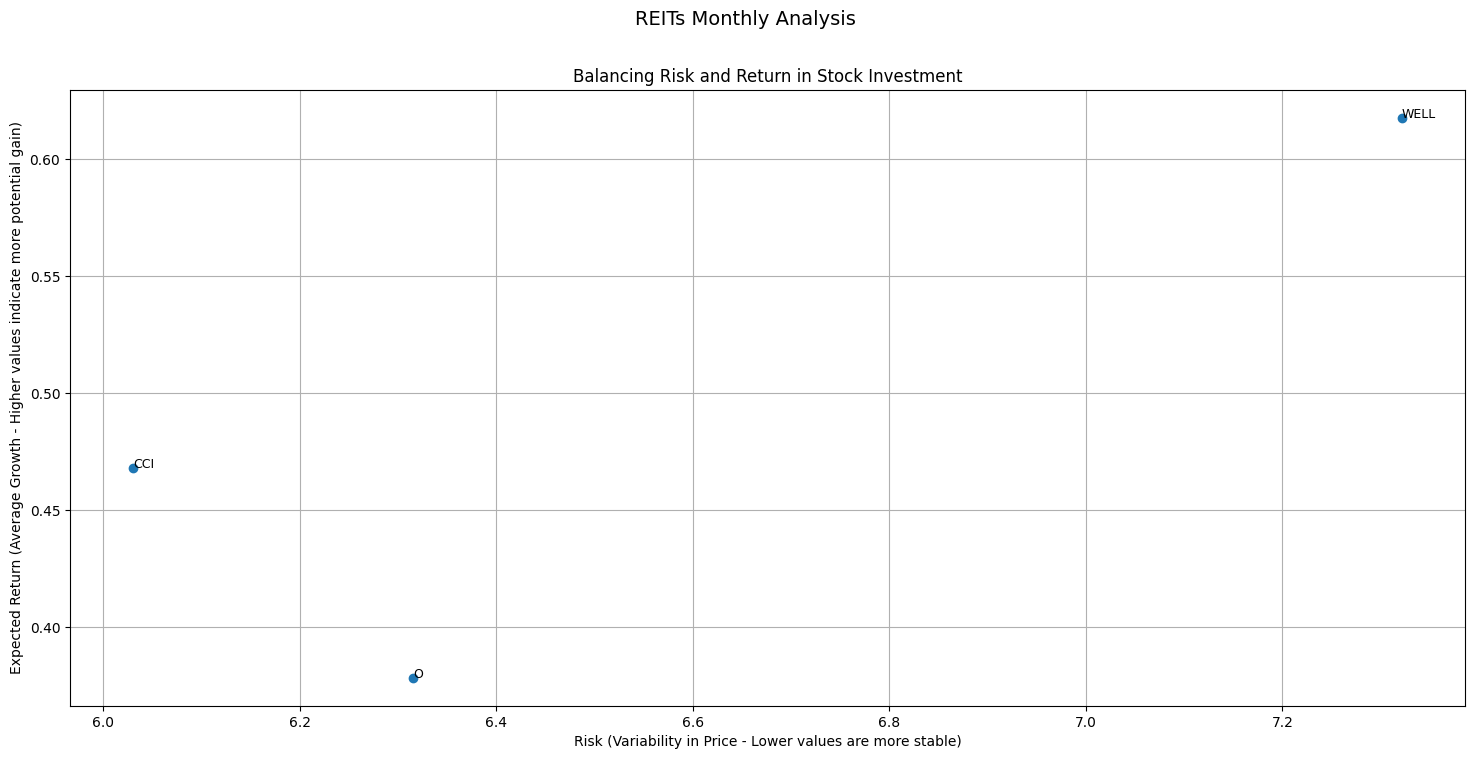

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import os

stock_path = '../Data Collection & Processing/reits'
df = pd.DataFrame()

for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.set_index('Date')

    # Resample based on months and compute the changes
    resampled = df_stock.resample('BM')
    monthly = resampled.apply(lambda x: x[-1])

    # Calculates the percentage change in the opening price for each month and 
    # stores it as a new column in the main DataFrame (df), named after the stock symbol.
    #new value - old value/old value
    percentage_change = monthly['Open'].pct_change()
    print("\nPercentage Change in Opening Price:")
    print(percentage_change.head())
    
    df[symbol] = percentage_change
    print("\nMain DataFrame with Percentage Change Column:")
    print(df.head())

# Drop NaNs
df = df.dropna()

# Calculate standard deviation and mean for each asset
risk = df.std() * 100  # Convert to percentage
expected_return = df.mean() * 100  # Convert to percentage

# Print out the results
for symbol in df.columns:
    print(f"Asset: {symbol}, Risk (Std Dev): {risk[symbol]:.2f}%, Expected Return (Mean): {expected_return[symbol]:.2f}%")

# Make the plot
plt.figure(figsize=(18,8))

# Scatterplot and annotation
plt.scatter(risk, expected_return)
for symbol in df.columns:
    plt.annotate(symbol, (risk[symbol], expected_return[symbol]), fontsize=9)

# Add gridlines
plt.grid(True)

# Enhanced Title and Axis Labels
plt.xlabel('Risk (Variability in Price - Lower values are more stable)')
plt.ylabel('Expected Return (Average Growth - Higher values indicate more potential gain)')
plt.title('Balancing Risk and Return in Stock Investment')
plt.suptitle('REITs Monthly Analysis', fontsize=14)

plt.show()